In [1]:
# RSI 백테스팅 전략 구현 (수정 버전)
import numpy as np
import pandas as pd
import vectorbt as vbt
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [2]:

# 데이터 다운로드 파라미터 설정
coin_target = 'BTC'  # 비트코인
coin_refer = 'USDT'  # 테더
end_date = datetime.now()  # 현재 시간까지
start_date = end_date - timedelta(days=30)  # 30일 전부터

In [3]:
# Binance에서 데이터 다운로드
binance_data = vbt.BinanceData.download(
    '%s%s' % (coin_target, coin_refer),
    start=start_date,
    end=end_date,
    interval='1m'
)
data = binance_data.get()

# 데이터 확인
print("데이터 샘플:")
print(data.head())
print("\n데이터 정보:")
print(data.info())


0it [00:00, ?it/s]

데이터 샘플:
                               Open       High       Low     Close     Volume  \
Open time                                                                       
2025-02-04 15:10:00+00:00  99900.75   99985.58  99845.94  99972.35   35.83566   
2025-02-04 15:11:00+00:00  99972.35  100000.00  99743.46  99847.99   28.87300   
2025-02-04 15:12:00+00:00  99848.00   99866.63  99568.00  99568.01   59.61857   
2025-02-04 15:13:00+00:00  99568.02   99624.35  99131.08  99161.60  146.33964   
2025-02-04 15:14:00+00:00  99164.95   99399.99  99146.47  99207.32   90.19599   

                                                Close time  Quote volume  \
Open time                                                                  
2025-02-04 15:10:00+00:00 2025-02-04 15:10:59.999000+00:00  3.581277e+06   
2025-02-04 15:11:00+00:00 2025-02-04 15:11:59.999000+00:00  2.883302e+06   
2025-02-04 15:12:00+00:00 2025-02-04 15:12:59.999000+00:00  5.943030e+06   
2025-02-04 15:13:00+00:00 2025-02-04 15:13:5

In [4]:
# RSI 파라미터 설정
rsi_window = 14  # RSI 계산 기간
rsi_oversold = 30  # 과매도 기준점
rsi_overbought = 70  # 과매수 기준점

# RSI 계산
rsi = vbt.indicators.RSI.run(
    data['Close'],
    window=rsi_window,
    short_name='RSI'
)

In [5]:
# 매수/매도 신호 생성
entries = rsi.rsi_crossed_above(rsi_oversold)  # RSI가 과매도 수준을 상향 돌파할 때 매수
exits = rsi.rsi_crossed_below(rsi_overbought)  # RSI가 과매수 수준을 하향 돌파할 때 매도

# 포트폴리오 백테스팅 실행
pf = vbt.Portfolio.from_signals(
    close=data['Close'],
    entries=entries,
    exits=exits,
    init_cash=1000,
    fees=0.001,
    freq='1m',
    direction='both',  # 'long' 대신 'both' 사용
    upon_opposite_entry='ignore',
    upon_long_conflict='ignore',
    log=True
)

# 백테스팅 결과 출력
print("\n===== RSI 전략 백테스팅 결과 =====")
print(f"총 수익: ${pf.total_profit():.2f}")
print(f"총 수익률: {pf.total_return() * 100:.2f}%")
print(f"최대 낙폭 (MDD): {pf.max_drawdown() * 100:.2f}%")
print(f"샤프 비율: {pf.sharpe_ratio():.2f}")
print(f"총 거래 횟수: {len(pf.trades)}")


===== RSI 전략 백테스팅 결과 =====
총 수익: $87.77
총 수익률: 8.78%
최대 낙폭 (MDD): -13.70%
샤프 비율: 2.37
총 거래 횟수: 1


In [6]:

# 승률 계산 (수정된 방식)
winning_trades = (pf.trades.returns > 0).sum()
total_trades = len(pf.trades)
win_rate = (winning_trades / total_trades * 100) if total_trades > 0 else 0
print(f"승률: {win_rate:.2f}%")

승률: 100.00%


/var/folders/pl/8x_tnrrs7gs4c0zdtv66ccgw0000gn/T/ipykernel_85637/503024246.py:45: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/pl/8x_tnrrs7gs4c0zdtv66ccgw0000gn/T/ipykernel_85637/503024246.py:45: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/pl/8x_tnrrs7gs4c0zdtv66ccgw0000gn/T/ipykernel_85637/503024246.py:45: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/pl/8x_tnrrs7gs4c0zdtv66ccgw0000gn/T/ipykernel_85637/503024246.py:45: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/pl/8x_tnrrs7gs4c0zdtv66ccgw0000gn/T/ipykernel_85637/503024246.py:45: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/pl/8x_tnrrs7gs4c0zdtv66ccgw0000gn/T/ipykernel_8

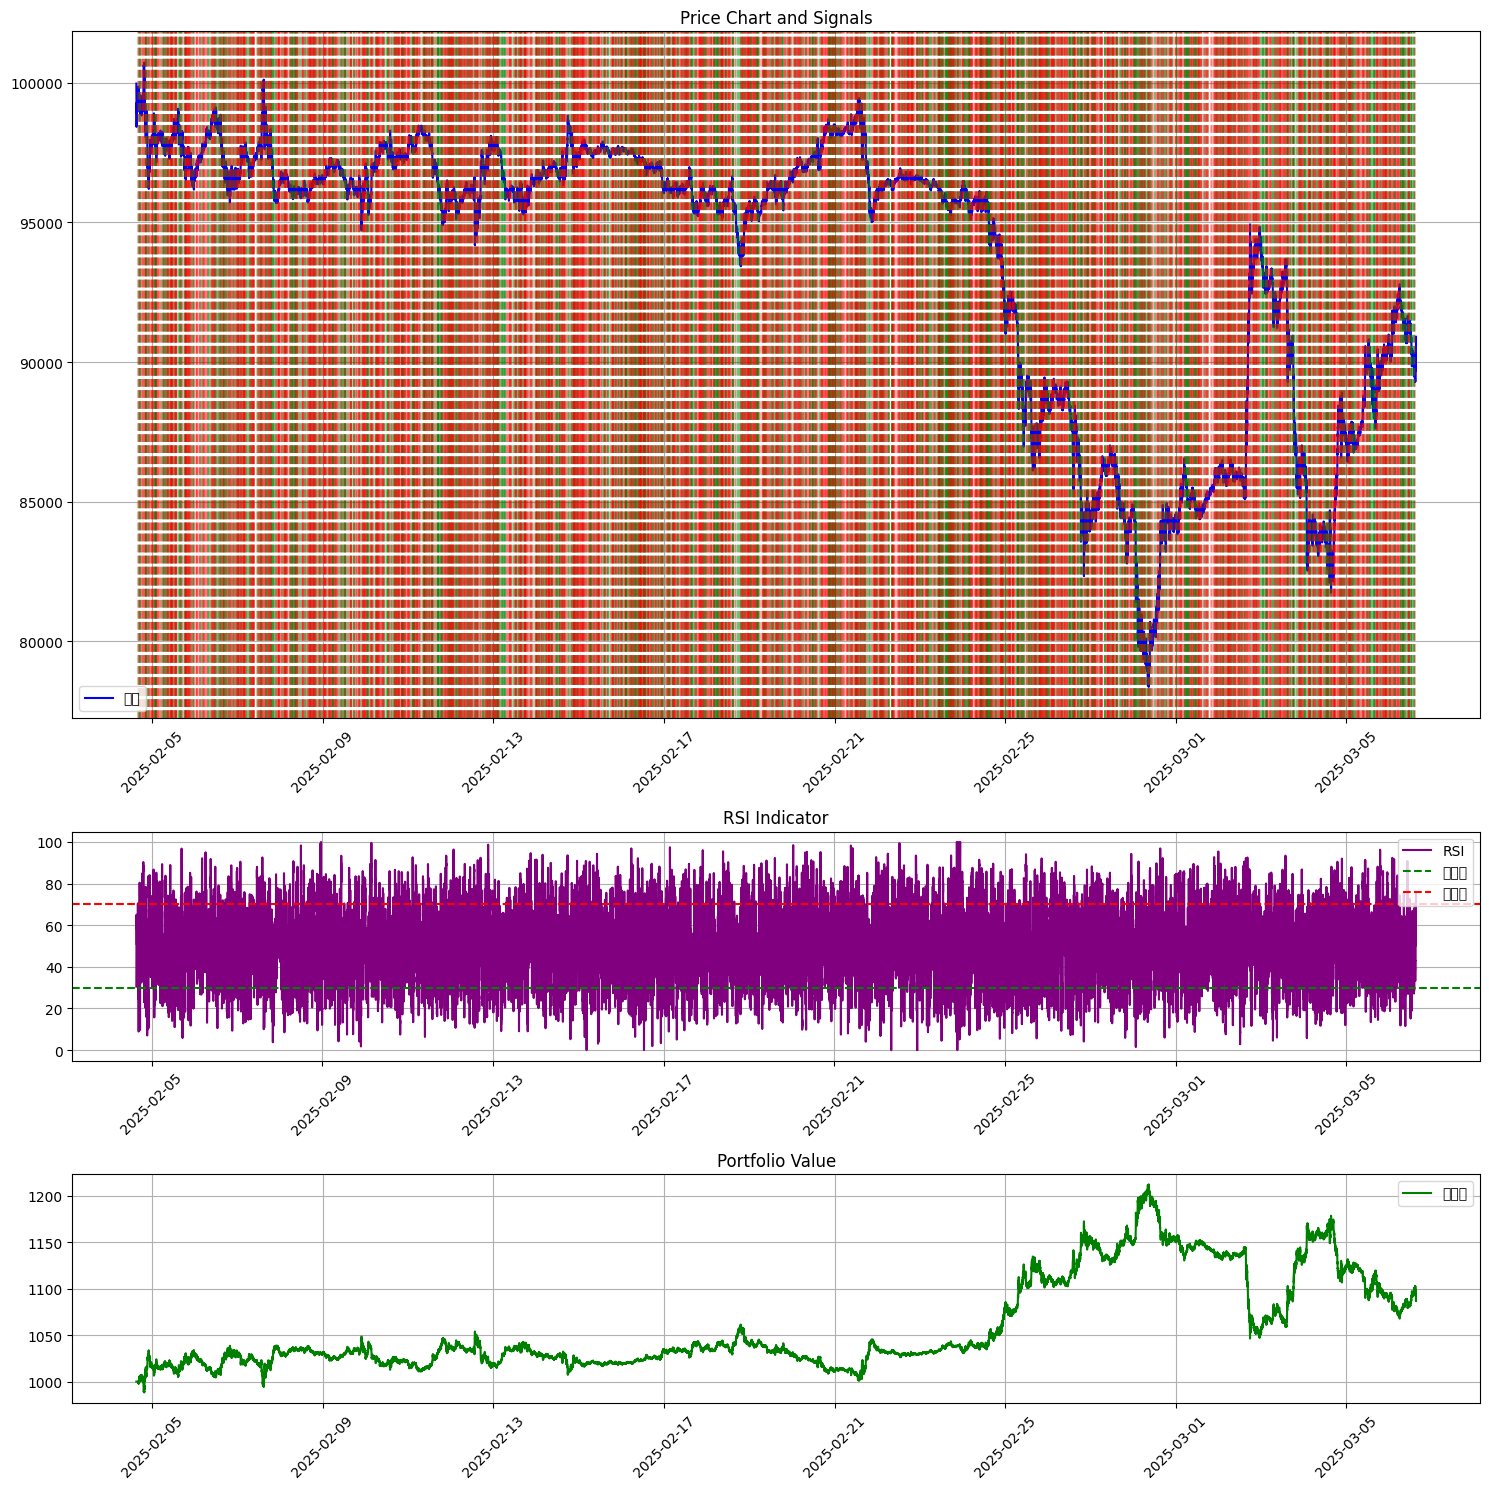

In [7]:
import matplotlib.font_manager as fm
# RSI 백테스팅 전략 구현 (수정 버전)
import numpy as np
import pandas as pd
import vectorbt as vbt
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# 한글 폰트 설정
from matplotlib import font_manager, rc

# 결과 시각화
fig, axes = plt.subplots(3, 1, figsize=(15, 15), gridspec_kw={'height_ratios': [3, 1, 1]})

# 가격 차트와 매수/매도 신호
axes[0].plot(data.index, data['Close'], label='가격', color='blue')
for idx in entries[entries].index:
    axes[0].axvline(x=idx, color='g', alpha=0.3, linestyle='--')
for idx in exits[exits].index:
    axes[0].axvline(x=idx, color='r', alpha=0.3, linestyle='--')
# axes[0].set_title('가격 차트 및 매수/매도 신호')
axes[0].set_title('Price Chart and Signals')
axes[0].legend()

# RSI 지표
axes[1].plot(data.index, rsi.rsi, label='RSI', color='purple')
axes[1].axhline(y=rsi_oversold, color='g', linestyle='--', label='과매도')
axes[1].axhline(y=rsi_overbought, color='r', linestyle='--', label='과매수')
# axes[1].set_title('RSI 지표')
axes[1].set_title('RSI Indicator')
axes[1].legend()

# 자본금 변화
equity = pf.value()  # equity_curve 대신 value() 사용
axes[2].plot(equity.index, equity, label='자본금', color='green')
# axes[2].set_title('자본금 변화')
axes[2].set_title('Portfolio Value')
axes[2].legend()

# x축 레이블 포맷 설정
for ax in axes:
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True)

plt.tight_layout()
plt.show()

In [10]:
# 월별 수익률 분석
returns = pf.returns()  # returns() 메서드 호출
monthly_returns = returns.resample('M').apply(lambda x: (1 + x).prod() - 1)
print("\n===== Monthly Returns =====")
print(monthly_returns)



===== Monthly Returns =====
Open time
2025-02-28 00:00:00+00:00    0.152394
2025-03-31 00:00:00+00:00   -0.056076
Freq: ME, dtype: float64


/var/folders/pl/8x_tnrrs7gs4c0zdtv66ccgw0000gn/T/ipykernel_85637/1827157741.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_returns = returns.resample('M').apply(lambda x: (1 + x).prod() - 1)


In [13]:

# 파라미터 최적화 함수
def optimize_rsi_strategy():
    # 파라미터 범위 설정
    param_grid = {
        'window': np.arange(5, 30, 5),
        'oversold': np.arange(20, 40, 5),
        'overbought': np.arange(60, 80, 5)
    }
    
    # 최적화 결과를 저장할 리스트
    results = []
    
    # 모든 파라미터 조합에 대해 백테스팅
    for window in param_grid['window']:
        for oversold in param_grid['oversold']:
            for overbought in param_grid['overbought']:
                # RSI 계산
                rsi = vbt.indicators.RSI.run(
                    data['Close'],
                    window=window
                )
                
                # 매수/매도 신호 생성
                entries = rsi.rsi_crossed_above(oversold)
                exits = rsi.rsi_crossed_below(overbought)
                
                # 포트폴리오 백테스팅
                pf = vbt.Portfolio.from_signals(
                    close=data['Close'],
                    entries=entries,
                    exits=exits,
                    init_cash=1000,
                    fees=0.001,
                    freq='1m',
                    direction='both'  # 여기도 'both'로 수정
                )
                
                # 결과 저장
                results.append({
                    'window': window,
                    'oversold': oversold,
                    'overbought': overbought,
                    'total_return': pf.total_return(),
                    'sharpe_ratio': pf.sharpe_ratio(),
                    'max_drawdown': pf.max_drawdown()
                })
    
    # 결과를 DataFrame으로 변환
    results_df = pd.DataFrame(results)
    
    # 최적 파라미터 찾기 (샤프 비율 기준)
    best_params = results_df.loc[results_df['sharpe_ratio'].idxmax()]
    
    print("\n===== 최적 파라미터 =====")
    print(f"RSI 기간: {best_params['window']}")
    print(f"과매도 기준: {best_params['oversold']}")
    print(f"과매수 기준: {best_params['overbought']}")
    print(f"총 수익률: {best_params['total_return'] * 100:.2f}%")
    print(f"샤프 비율: {best_params['sharpe_ratio']:.2f}")
    print(f"최대 낙폭: {best_params['max_drawdown'] * 100:.2f}%")
    
    return best_params.to_dict()

# 파라미터 최적화 실행 (필요한 경우 주석 해제)
best_params = optimize_rsi_strategy()



===== 최적 파라미터 =====
RSI 기간: 25.0
과매도 기준: 20.0
과매수 기준: 70.0
총 수익률: -13.47%
샤프 비율: -2.67
최대 낙폭: -20.73%
